In [8]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=100)
print(faces.target_names)
print(faces.images.shape)

['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']
(1140, 62, 47)


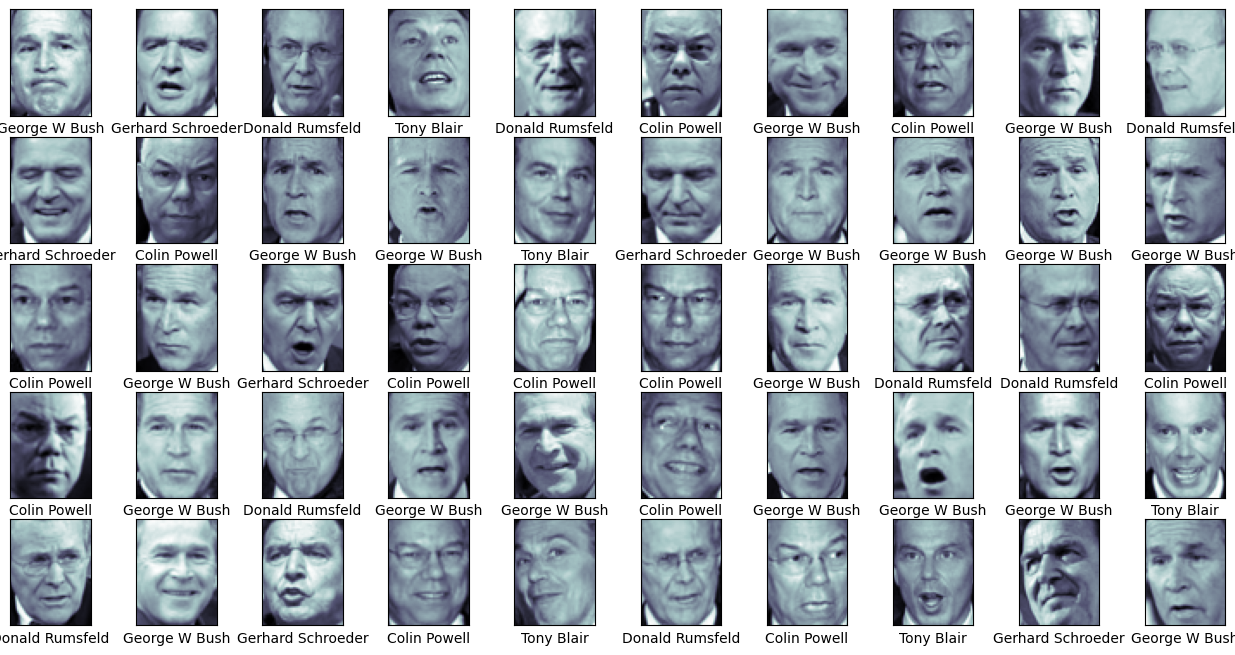

In [9]:
fig, ax = plt.subplots(5, 10, figsize=(16, 8))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [10]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline


In [11]:
pca = PCA(n_components=350, whiten=True, svd_solver='randomized',random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(faces.data, faces.target, random_state=42)

In [13]:
from sklearn.model_selection import GridSearchCV
# Correct the parameter names to include the step name
param_grid = {'svc__C': [1, 2, 10, 50], 'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)
%time grid.fit(x_train, y_train)
print(grid.best_params_)

CPU times: user 1min 58s, sys: 34.4 s, total: 2min 33s
Wall time: 1min 34s
{'svc__C': 10, 'svc__gamma': 0.0005}


In [14]:
model = grid.best_estimator_
yfit = model.predict(x_test)

In [15]:
yfit

array([0, 0, 2, 3, 2, 0, 0, 4, 2, 2, 4, 2, 1, 0, 2, 0, 4, 4, 2, 0, 0, 2,
       1, 2, 2, 2, 4, 2, 0, 1, 3, 1, 1, 0, 0, 0, 2, 0, 3, 2, 2, 2, 2, 2,
       0, 3, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 4, 3,
       3, 2, 0, 2, 4, 2, 0, 3, 2, 2, 1, 4, 2, 2, 4, 2, 2, 2, 3, 2, 2, 2,
       0, 1, 2, 4, 2, 4, 2, 0, 2, 0, 2, 3, 2, 3, 2, 1, 2, 1, 2, 1, 2, 2,
       0, 2, 2, 1, 0, 2, 2, 1, 2, 1, 2, 0, 2, 0, 2, 1, 3, 1, 2, 4, 2, 1,
       0, 0, 4, 2, 3, 4, 0, 3, 2, 0, 2, 1, 1, 0, 3, 2, 2, 2, 2, 2, 2, 4,
       2, 4, 4, 0, 0, 4, 0, 2, 2, 1, 2, 1, 2, 0, 2, 0, 1, 2, 2, 2, 0, 2,
       1, 2, 2, 4, 4, 0, 4, 2, 4, 0, 2, 1, 2, 2, 2, 2, 3, 2, 1, 0, 0, 2,
       0, 2, 0, 2, 0, 3, 2, 2, 0, 0, 0, 2, 3, 2, 4, 0, 2, 1, 2, 2, 2, 2,
       2, 3, 0, 2, 1, 4, 0, 2, 2, 2, 2, 0, 2, 2, 4, 4, 2, 0, 2, 3, 2, 2,
       2, 2, 2, 0, 0, 2, 0, 2, 2, 3, 3, 0, 2, 3, 1, 2, 0, 2, 3, 2, 2, 2,
       4, 2, 0, 0, 4, 3, 4, 3, 2, 0, 0, 1, 4, 2, 0, 3, 2, 0, 2, 1, 2])

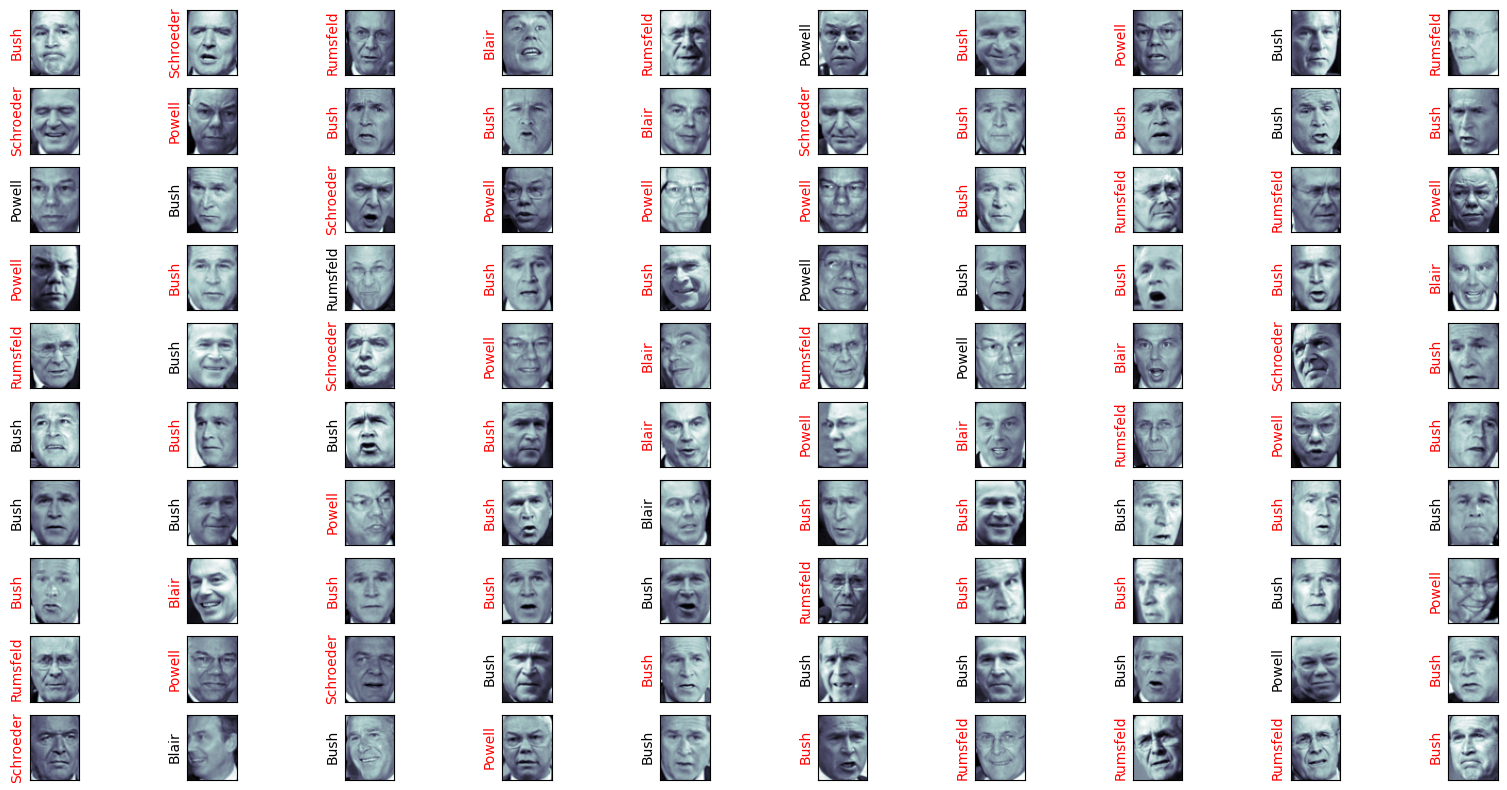

In [16]:
fig, ax = plt.subplots(10, 10, figsize=(20, 10))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[faces.target[i]].split()[-1],
                   color='black' if yfit[i] == faces.target[i] else 'red')

In [19]:
from sklearn.model_selection import GridSearchCV
# Correct the parameter names to include the step name
param_grid = {
    'pca__n_components': [150, 200, 250, 300], # Add PCA parameters
    'svc__C': [1, 2, 10, 50],
    'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]
}
grid = GridSearchCV(model, param_grid)
%time grid.fit(x_train, y_train)
print(grid.best_params_)
from sklearn.metrics import classification_report
# Predict on the test set instead of the entire dataset
yfit = model.predict(x_test)
print(classification_report(y_test, yfit, target_names=faces.target_names))
# Remove or modify the following line if you intend to evaluate on the entire dataset
#print(classification_report(faces.target, yfit, target_names=faces.target_names))

CPU times: user 5min 37s, sys: 1min 42s, total: 7min 20s
Wall time: 4min 20s
{'pca__n_components': 150, 'svc__C': 1, 'svc__gamma': 0.005}
                   precision    recall  f1-score   support

     Colin Powell       0.86      0.89      0.88        64
  Donald Rumsfeld       0.86      0.78      0.82        32
    George W Bush       0.88      0.93      0.90       127
Gerhard Schroeder       0.92      0.83      0.87        29
       Tony Blair       0.83      0.76      0.79        33

         accuracy                           0.87       285
        macro avg       0.87      0.84      0.85       285
     weighted avg       0.87      0.87      0.87       285

